# Palmer Penguins
***

## Introduction

This notebook contains my analysis of the famous *Palmer Penguins* dataset. Horst *et al* argue that this dataset is better suited for teaching data science than the *Iris* dataset due to (among other issues) *Iris*'s lack of missing values and ties to eugenics research. The data for the *Palmer Penguins* set was collected by Gorman et al on the Palmer Archipelago in Antarctica between 2007 and 2009 and contains body measurements for three species of penguin: Adélie (*P. adeliae*), Chinstrap (*P. antarcticus*), and Gentoo (*P. papua*). The portion of the dataset used for this analysis also includes the sex of each penguin as well as the island each was recorded on.

## Imports

There are several modules we'll need to import in order to carry out our analysis.

We're using pandas as the data structure. This will allow us to investigate CSV files. NumPy will allow us to generate arrays and perform calculations, while Matplotlib will let us plot our data.

In [66]:
# Data frames
import pandas as pd

# Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

## Load the dataset

We'll also need to load the *Palmer Penguins* dataset from a URL.


In [67]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Examine the data

Now that we've loaded the dataset, we can start examining the data.


In [68]:
# Look at the data set
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Examining the first penguin

We'll start by taking a look at the characteristics of the first penguin in the list.


In [69]:
# Look at the first row
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

### Counting the species

The first penguin is an Adelie penguin, but there are penguins from three different species included in the set. We're going to check how many of each species we have.

In [70]:
# Count the number of penguins of each species
df["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

### Counting the population of each island

This data was gathered from three different islands near Palmer Station, west of the Antarctic Peninsula. Let's see how many penguins were found on each one.

In [71]:
# Count the number of penguins on each island
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

### Counting the sexes

There are 344 penguins in the list, so next we'll look at how many of each sex were observed. 


In [72]:
# Count the number of penguins of each sex
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

(Note: 11 penguins did not have their sex recorded, hence the number of males and females adding to 333 instead of 344.)

### Describing the set <a id='describe_set'></a>

Finally, let's see some of the averages for the group.


In [73]:
# Describe the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


(Note: these figures are slightly skewed since eleven of the penguins in the group didn't have their characteristics recorded beyond species and location, even though they are included in the overall headcount.)

## Modeling the dataset

### Types of variable

There are a few different types of variables that we can use to model the variables in Python. 

Given that bill length and depth, flipper length, and body mass are all numbers, the main options we have for these are integers and floats. Since all of the figures for bill length and depth are decimals, they'll need to be floats instead of integers. Flipper length and body mass are all given as whole numbers which are larger than the figures for the bill measurements, so they could be integers (which can be both larger and more accurate than floats).

However, all of the variables in an array need to be of the same type when using NumPy in calculations, so for this reason it may be better to have all of the numerical values be floats, even those that aren't decimals.

Pandas will allow us to check what types of variable we have in the dataset.

In [74]:
# Inspect the types
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

As expected, all of the numerical values are floats, while species, island and sex are all listed as objects.

### Visualising the data

#### Plotting the species counts

We can see from the species counts above that there are far fewer Chinstrap penguins than there are Gentoo or Adelie. A bar chart will allow us to present this information in a format that's easier to digest.

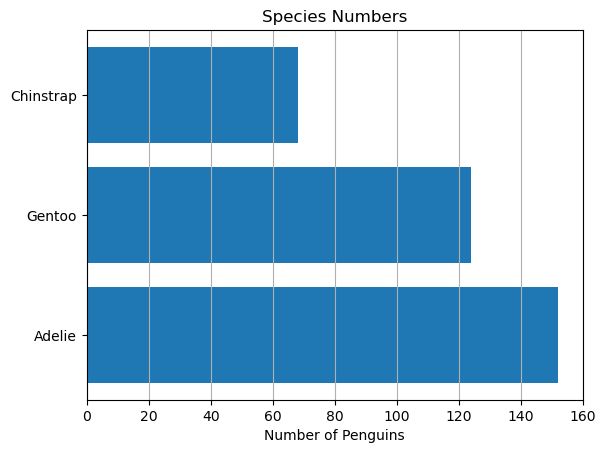

In [75]:
# Create the figure and axes
fig, ax = plt.subplots()

# Give the species names as an array
species = np.array(["Adelie", "Gentoo", "Chinstrap"])

# Get the number of each species
count = df["species"].value_counts()

# Convert the data frame to an array
count = count.to_numpy() 

# Plot a bar chart
ax.barh(species, count)

# Label the x axis
ax.set_xlabel("Number of Penguins")

# Add a title
ax.set_title("Species Numbers")

# Set scale of x axis
ax.set_xlim(0, 160)

# Add grid
ax.grid(axis="x")

#### Plotting the bill length

Similarly to the above, we can use histograms to present the information from [Describing the set](#describe_set) in a format that's easier to digest. For our example, we'll take the bill length of the penguins.

Text(53, 41, '$\\sigma=5.459584$')

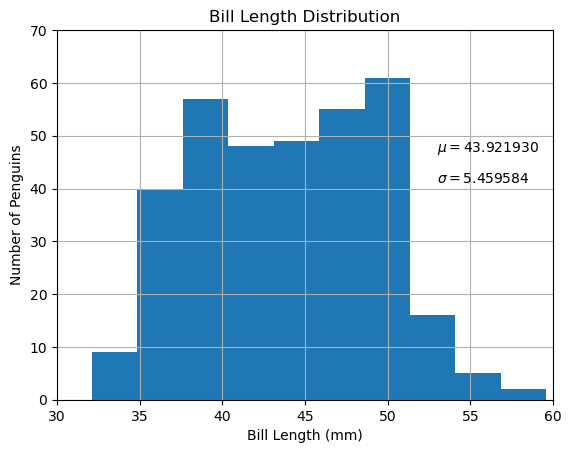

In [76]:
# Create the figure and axes
fig, ax = plt.subplots()

# Get the bill lengths
b_length = df["bill_length_mm"]

# Remove the NaN results
b_length.dropna(inplace=True)

# Convert the data frame to an array
b_length = b_length.to_numpy()

# Plot a histogram
ax.hist(b_length)

# Label the axes
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Number of Penguins")

# Add a title
ax.set_title("Bill Length Distribution")

# Add grid
ax.grid()

# Set scale of axes
ax.set_xlim(30, 60)
ax.set_ylim(0, 70)

# Add text showing the mean 
ax.text(53, 47, r'$\mu=43.921930$')

# Add text showing the standard deviation
ax.text(53, 41, r'$\sigma=5.459584$')

## Relationship between body mass and flipper length

We're now going to take a look at the relationship between the body mass of the penguins and the length of their flippers. Horst et al briefly discussed this relationship during their comaprison of the *Palmer Penguins* and *Iris* datasets, giving it as an example of a representative linear relationship. In this discussion, we're going to look at the correlation between the two, and see if we get a similar result. While Horst et al distinguished between the three different species in their discussion, we're going to assess the group as a whole.

In order to do this, we're going to plot body mass against flipper length, add a line of best fit and calculate the correlation coefficient. For the line of best fit, we'll use body mass for our x values and use the following formula to find the corresponding y values:

$ y = mx + c = p_1 x^1 + p_0 = p_ x + p_0 $

Text(0, 0.5, 'Flipper Length (mm)')

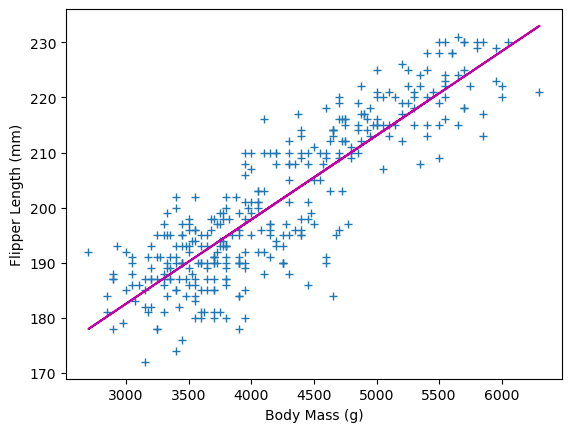

In [77]:
# Create the figure and axes
fig, ax = plt.subplots()

# Get the variables we want to plot
b_mass = df["body_mass_g"]
f_length = df["flipper_length_mm"]

# Remove the NaN values as they'll cause errors with the algebra later on
b_mass.dropna(inplace=True) 
f_length.dropna(inplace=True)

# Convert the data frames to arrays
b_mass = b_mass.to_numpy() 
f_length = f_length.to_numpy()

# Define m and c for the line of best fit. The 1 means the highest exponent for x will be 1, giving a straight line.
m, c = np.polyfit(b_mass, f_length, 1)

# Plot the variables with "+" as the marker style
ax.plot(b_mass, f_length, "+") 

# Plot the line of best fit
ax.plot(b_mass, m*b_mass +c, color = "#c201a4")

# Label the axes
ax.set_xlabel("Body Mass (g)")
ax.set_ylabel("Flipper Length (mm)")


As we can see from the plot above, it looks like the heavier penguins tend to have longer flippers than the lighter penguins. However, if we calculate the correlation coefficient, we can see what the actual correlation between the two variables is.

In [78]:
np.corrcoef(b_mass, f_length)

array([[1.        , 0.87120177],
       [0.87120177, 1.        ]])

A correlation coefficient close to 1 or -1 indicates a strong positive or negative correlation between variables, while a coefficient of 0 indicates that there's no correlation. In this case, our coefficient is 0.87120177, meaning there's a fairly strong positive correlation between body mass and flipper length. In other words, the heavier a penguin is, the longer their flippers are likely to be. This matches the analysis carried out by Horst et al.

## Conclusion

***
# End